# Física de partículas ...  com R  e tidyverse

Esse tutorial utiliza os dados abertos do experimento CMS do LHC [CMS Open Data](http://opendata.cern.ch/about/cms) Disponíveis no site [CERN Open Data portal](http://opendata.cern.ch).

Para rodar esse tutorial offline, vide o arquivo [README](https://github.com/cms-opendata-education/cms-rmaterial-multiple-languages/blob/master/README.md), con instruções em inglés. Eu estou rodando o  notebook na minha instalação local de R. 

Também é possível copiar as linhas de código e colar na consola de comandos do RStudio, ou num script e logo rodá-lo.


**Créditos:**
   * Adaptado do original de [Edith Villegas Garcia](https://github.com/edithvillegas),  [Andrew John Lowe](https://github.com/andrewjohnlowe) e [Achintya Rao](https://github.com/RaoOfPhysics). 

   * Traduzido ao português e adicionado o ajuste por [Clemencia Mora Herrera](https://github.com/clemencia).

---



## Os dados:

Este tutorial, introduce análise de dados com  R usando dados divulgados ao público no portal **CMS Open Data**. 

A origem desses dados colisões de prótons do LHC no ano 2011 (Energia do centro-de-massa de 7 TeV). 
Estes dados contém medições de partículas do estado final, dois ***múons*** (uma versão um pouco mais pesada do elétron, comúm em raios cósmicos). 

A primeira imagem mostra um desenho esquemático do LHC e seus 4 principais experimentos.

<figure>
    <img src="https://github.com/cms-opendata-education/zboson-exercise/blob/master/images/LHC.png?raw=true" alt="image missing" style="height: 350px" />
   <figcaption> Imagem 1: O LHC e seus 4 principais experimentos. &copy; 
       <a href="https://cds.cern.ch/record/1708847">CERN</a> 
    </figcaption>
</figure>


No LHC prótons são acelerados a altíssimas velocidades e feitos colidir em pontos determinados (os 4 da figura acima), onde cada experimento com seus detectores registra e salva a informação dos produtos da colisão. A energia da colisão pode ser convertida em massa de novas partículas ($E=mc^2$) que podem decair em outras mais leves, deixando sinais nos instrumentos de medição em cada detector. Os sinais são traduzidos em momentum ($p=mv$), carga da partícula, energia e a sua direção de saida do ponto de interação.



O seguinte é um vídeo que mostra como acontecem as colisões e medições no acelerador LHC.

In [1]:
library(IRdisplay)
display_html('<iframe width="560" height="315" src="https://www.youtube.com/embed/pQhbhpU9Wrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Se combinarmos a informação da energia e momentum dos dois múons para cada observação (_evento_), podemos observar que em certos valores de  ***massa invariante*** (a energia de uma partícula de massa $m$ em reposo é $E=m c^2$ --> relatividade restrita isto é sempre válido no sistema de referência dela própia, então essa massa própria é constante para sistemas de referência diferentes) a frequência de observações é maior: isto quer dizer que existe uma partícula subatómica que decaiu em um par de múons e chamamos isso de uma "ressonância". Podemos inferir a presença dessas partículas indiretamente observando seus produtos de decaimento, os múons, e a sua frequência.


<figure>
    <img src="http://github.com/cms-opendata-education/zboson-exercise/blob/master/images/eventdisplay.png?raw=true" alt="image missing" style="height: 350px" />
    <figcaption> Imagem 2: Visualização da detecção de dois múons em uma colisão no CMS. </figcaption>
</figure>

<figure>
    <img src="http://github.com/cms-opendata-education/zboson-exercise/blob/master/images/CMS.jpg?raw=true" alt="image missing" style="height: 350px" />
    <figcaption> Imagem 3: Estrutura do experimento CMS, aberto. &copy; 
        <a href="https://cds.cern.ch/record/1433717">CERN</a> 
     </figcaption>
</figure>

<figure>
    <img src="http://github.com/cms-opendata-education/zboson-exercise/blob/master/images/CMS2.gif?raw=true" alt="image missing" style="height: 350px" /> 
    <figcaption>Imagem 4: Seção transversal do CMS, e como as partículas são detectadas nele. &copy; 
        <a href=\"https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172\">CERN</a> 
    </figcaption>
</figure>

Nesse tutorial podemos criar um gráfico de frequências onde é possível perceber os picos correspondentes a algumas dessas partículas que tem preferência pelo decaimento em dois múons.

## Breve introdução a R

R é uma linguagem de programação usada amplamente em estatística e ciência de dados. 


_"R é a língua franca da estatística"_ (W. Zeviani, UFPR)

[ http://leg.ufpr.br/~walmes/cursoR/data-vis/slides/01-tidyverse.pdf ] 



 
### Os tipos de dados em R

Os tipos básicos de dados em R são:
- Logical -- lógicos ou booleanos: TRUE ou FALSE)
- Numeric -- números em geral, números reais
- Integer -- inteiros
- Complex -- complexos
- Character -- carateres ou sequências deles: letras, números como carater, símbolos e frases

Em geral, sem ter que especificar, R assigna automátiamente um tipo às variáveis declaradas.
Qualquer número é tipo ```numeric```, mas para especificar ```integer``` temos que adicionar um aletra "L" no final do valor.

A linha abaixo declara a variável ```a``` com valor $5$ de tipo inteiro.

In [2]:
a <- 5L

Para declarar variáveis complexas a sintaxe é a seguinte:

In [3]:
b <- 5 + 3i
d <- 8 + 0i

As variáveis lógicas podem tomar o valor ```TRUE``` ou ```FALSE```, mas també pode ser assignado o valor resultante de uma expressão condicional, p.ex.:

In [4]:
c <- 3 > 5

As variáveis de carateres podem ser letras, frases ou outros carateres incluindo números entre aspas.

In [5]:
cr <- "3!"

Para saber o valor de cada variável eu simplesmente chamo o nome:

In [6]:
a
b
c
d
cr

[1] 5

[1] 5+3i

[1] FALSE

[1] 8+0i

[1] "3!"

#### Vetores

É possível agrupar valores em variáveis vetoriais dessa forma:

In [7]:
a <- c(2, 3, 5)

Os vetores podem ser de qualquer tipo. Também podemos aplicar condições aos vetores para criar um vetor lógico:

In [8]:
a <- c(2, 5, 8, 3, 9)
b <- a > 3

O vetor ```b``` é o resultado da avaliação da condição ```x>3``` para cada elemento ```x``` do vetor ```a```.

In [9]:
b

[1] FALSE  TRUE  TRUE FALSE  TRUE

Para acessar algum elemento do vetor, podemos chamar o nome da variável vetor com o índice do elemento desejado. O contador começa de 1 (outras linguagens utilizam 0).

Entáo o primeiro elemento de ```a``` será acessado assim:

In [10]:
a[1]

[1] 2

Também é possível acessar os elementos que satisfazem uma condição. A linha seguinte entrega o subconjunto (sub-vetor) dos elementos de ```a``` que tem valor maior que $3$.

In [11]:
c<-a[a>3]
c

[1] 5 8 9

#### Matrices

Em R podemos criar uma matriz a partir de vetores. As matrices são estruturas de dados em 2 dimensões. 

Podemos criar a matriz especificando os valores nela, o numero de linhas e colunas e se o preenchimento sera por filas ou por colunas.

Neste exemplo começamos por um vetor do 1 ao 9:

In [12]:
a <- c(1:9)
a

[1] 1 2 3 4 5 6 7 8 9

Logo declaramos ```A``` uma matriz de 3x3 componentes, preenchidas por linha, com os 9 elementos de ```a```.

In [13]:
A <- matrix(a, nrow=3, ncol=3, byrow=TRUE)

A

1,2,3
4,5,6
7,8,9


Para accessar os elementos da matriz, usamos colchetes com o numero de linha e coluna. Por exemplo para acessar o elemento na segunda linha, terceira coluna de ```A``` fazemos:

In [14]:
A[2,3]

[1] 6

Podemos acessar uma linha completa se especificamos só o primeiro número e deixamos em branco o índice das colunas, e viceversa. Por exemplo a chamada ```A[2,]``` retorna os valores da segunda linha de ```A```.  

In [15]:
A[2,]

[1] 4 5 6

As matrices podem ser acessadas com condições, como foi no caso dos vetores. 

In [16]:
# Criar um vetor de valores 1 a 25
a <- c(1:25)

# Criar a matriz a partir desse vetor com  5 linhas e  5 colunas, preenchendo linha por linha.
A <- matrix(a, nrow=5, ncol=5, byrow=TRUE)



# Acessar os elementos de A que sejam maiores que 12
# ao colocar a condição "A>12" nos colchetes
# a variável nova é um vetor.
C<-A[A>12]

print(C)

 [1] 16 21 17 22 13 18 23 14 19 24 15 20 25


In [17]:
length(C)


[1] 13

#### Arrays (Arranjos)

Arrays são similares às matrices, mas podem ter mais de duas dimensões. 

Podem ser criadas, como as matrices, a partir de um vetor e especificando as dimensões escolhidas.

In [18]:
# Criar um vetor com valores 1 a 27
a <- c(1:27)

# Criar um array a partir do vetor a
# que contem 3 matrices de 3 linhas e 3 colunas .
A <- array(a, dim=c(3,3,3))

# Imprimir o array.
print(A)

, , 1

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9

, , 2

     [,1] [,2] [,3]
[1,]   10   13   16
[2,]   11   14   17
[3,]   12   15   18

, , 3

     [,1] [,2] [,3]
[1,]   19   22   25
[2,]   20   23   26
[3,]   21   24   27



#### Listas

As listas são como  vetores, mas podem conter diferentes tipos de dados concomitantemente, e também vetores, entre seus elementos. 

In [19]:
l <- list(c(1,2,3),'a', 1, 1+5i)

l

[[1]]
[1] 1 2 3

[[2]]
[1] "a"

[[3]]
[1] 1

[[4]]
[1] 1+5i

#### Data Frames


Data  frames  são como listas de vetores com o mesmo comprimento. São usados para armazenar dados em forma de tabela. 

Para criar um data frame podemos fazer, por exemplo:


In [20]:
data <- data.frame(
    Nome = c("Thereza", "Diana"),
    Genero = c('F','F'),
    Idade = c(20, 23)
)

data

Nome,Genero,Idade
<fct>,<fct>,<dbl>
Thereza,F,20
Diana,F,23


(Para mim, aqui reside a beleza do R  ... essa simplicidade!)

Para acessar uma coluna em particular, é simplesmente usar o ```$``` e o nome da coluna. 
Por exemplo para ver os nomes:

In [21]:
data$Nome

[1] Thereza Diana  
Levels: Diana Thereza

Se queremos ver só uma linha (instância ou observação do seu experimento, medição) chamamos o número da linha

In [22]:
data[1,]

Nome,Genero,Idade
<fct>,<fct>,<dbl>
Thereza,F,20


E R tem várias funções para importar arquivos (em formato texto, csv, até xls!) direto para data frames. 

Como não amar?

## Explorando o CMS Open Data


Agora vamos à tarefa em mãos: analisar dados do CMS.

---

### Importar dados dos arquivos CSV 

No portal do [CERN Open Data](http://opendata.cern.ch) tem vários conjuntos de dados disponíveis. Nós vamos usar dados que já foram reduzidos ao formato CSV (comma-separated values), importá-los em R e analizar seu conteúdo. 

Os dados desse tutorial vêm do seguinte registro: [http://opendata.cern.ch/record/545](http://opendata.cern.ch/record/545)

Para importar usamos o seguinte comando:

In [23]:
mumu <- read.csv("http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv")

O comando anterior carregou os dados do arquivo  `Dimuon_DoubleMu.csv` numa variável chamada `mumu`, que é um data frame. 

Para olhar o conteúdo das primeiras 6 linhas podemos chamar a função `head` e para saber o número de observações usamos a função `nrow`

In [24]:
nrow(mumu)
head(mumu)

[1] 100000

Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,⋯,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,⋯,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,⋯,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,⋯,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,⋯,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,⋯,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159
165617,74570517,G,14.9422,-9.1744,-10.3203,-5.7079,13.8087,-0.4024,-2.2975,⋯,T,2.9879,-0.9862,0.3541,-2.7962,1.0479,-1.7080,2.7969,1,6.8270


O nosso conjunto de dados tem 100 mil linhas (cada linha é um evento de colisão) e 21 colunas (cada coluna é uma variável da descrição ou das medições dos produtos finais do evento).


Nesse ponto já podemos chamar o *tidyverse*. Para ter uma visualização mais "agradável" dos dados podemos mudar de data frame para *tibble*.

In [25]:
require(tidyverse)
tbmumu<- mumu %>% as_tibble()

Loading required package: tidyverse
Warning message in as.POSIXlt.POSIXct(Sys.time()):
"unknown timezone 'zone/tz/2019b.1.0/zoneinfo/America/Sao_Paulo'"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


O tidyverse inclui o pacote `magrittr`,  que introduz o operador *pipe* (como tubulação, mas também "ce ci n'est pas une pipe") com símbolo `%>%` o que entrega o objeto da esquerda como argumento à função da direita. E com esses encanamentos é possível fazer várias operações sucessivas de forma concisa.

Então o código acima aplica a função `as_tibble` ao data frame `mumu` e o resultado (que é um *tibble*) é armazenado na variável `tbmumu`.

Logo ao imprimir as primeiras 6 linhas da nossa tabela tipo *tibble* temos uma visualização que: 

   * cabe na tela
   * dá informações sobre aquilo que não coube
   

In [26]:
print(head(tbmumu))

# A tibble: 6 x 21
     Run  Event type1    E1    px1     py1   pz1   pt1   eta1  phi1    Q1 type2
   <int>  <int> <fct> <dbl>  <dbl>   <dbl> <dbl> <dbl>  <dbl> <dbl> <int> <fct>
1 165617 7.46e7 G      9.70 -9.51    0.366  1.86  9.52  0.194  3.10    -1 G    
2 165617 7.51e7 G      6.20 -4.27    0.456 -4.48  4.29 -0.912  3.04    -1 G    
3 165617 7.56e7 G     19.3  -4.21   -0.652 18.8   4.26  2.19  -2.99    -1 G    
4 165617 7.57e7 G      7.04 -6.33   -0.268  3.08  6.33  0.469 -3.10    -1 G    
5 165617 7.59e7 G      7.28  0.103  -5.53  -4.72  5.53 -0.774 -1.55    -1 G    
6 165617 7.46e7 G     14.9  -9.17  -10.3   -5.71 13.8  -0.402 -2.30    -1 T    
# ... with 9 more variables: E2 <dbl>, px2 <dbl>, py2 <dbl>, pz2 <dbl>,
#   pt2 <dbl>, eta2 <dbl>, phi2 <dbl>, Q2 <int>, M <dbl>


Do output acima podemos ver as primeiras 12 colunas, com seus tipos, com cores para valores negativos, e temos a informação adicional de 9 variáveis não mostradas. Podemos acessar as colunas e linhas da mesma forma do data frame.

In [27]:
# imprime os primeiros 6 elementos da coluna chamada E1
# o que é retornado com esse operador é um vetor
print(head(tbmumu$E1))

[1]  9.6987  6.2039 19.2892  7.0427  7.2751 14.9422


In [28]:
# imprime a primeira linha de dados
# retora um novo tibble que é sub-conjunto do original
print(tbmumu[1,])

# A tibble: 1 x 21
     Run  Event type1    E1   px1   py1   pz1   pt1  eta1  phi1    Q1 type2
   <int>  <int> <fct> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <int> <fct>
1 165617 7.46e7 G      9.70 -9.51 0.366  1.86  9.52 0.194  3.10    -1 G    
# ... with 9 more variables: E2 <dbl>, px2 <dbl>, py2 <dbl>, pz2 <dbl>,
#   pt2 <dbl>, eta2 <dbl>, phi2 <dbl>, Q2 <int>, M <dbl>


In [29]:
# Este outro exemplo retorna o subconjunto das 10 primeiras linhas
print(tbmumu[1:10,])

# A tibble: 10 x 21
      Run  Event type1    E1    px1     py1    pz1   pt1   eta1  phi1    Q1
    <int>  <int> <fct> <dbl>  <dbl>   <dbl>  <dbl> <dbl>  <dbl> <dbl> <int>
 1 165617 7.46e7 G      9.70 -9.51    0.366   1.86  9.52  0.194  3.10    -1
 2 165617 7.51e7 G      6.20 -4.27    0.456  -4.48  4.29 -0.912  3.04    -1
 3 165617 7.56e7 G     19.3  -4.21   -0.652  18.8   4.26  2.19  -2.99    -1
 4 165617 7.57e7 G      7.04 -6.33   -0.268   3.08  6.33  0.469 -3.10    -1
 5 165617 7.59e7 G      7.28  0.103  -5.53   -4.72  5.53 -0.774 -1.55    -1
 6 165617 7.46e7 G     14.9  -9.17  -10.3    -5.71 13.8  -0.402 -2.30    -1
 7 165617 7.47e7 G     42.0  -1.48  -12.5    40.0  12.6   1.88  -1.69    -1
 8 165617 7.47e7 G     14.4  -4.34   -6.07  -12.3   7.46 -1.28  -2.19     1
 9 165617 7.52e7 G      9.76  2.39   -3.78    8.67  4.47  1.42  -1.01    -1
10 165617 7.52e7 G     10.2   0.476  -8.52    5.52  8.53  0.609 -1.51    -1
# ... with 10 more variables: type2 <fct>, E2 <dbl>, px2 <dbl>, py2 

### Calcular a Massa invariante

Nossa tabela tem observações de colisões com 2 *múons* no estado final.

Como vimos na tabela, temos valores para energia (E), o momentum linear (px, py, pz), a *pseudo-rapidez* (eta ou η, que tem relação com o ángulo polar) e o ángulo azimutal (phi ou φ). 

Podemos calcular a massa invariante, ou seja a energia equivalente em repouso que produziu esses múons, com a seguinte equação: 

$M = \sqrt{(\sum{E})^2 - ||\sum{p}||^2}$

onde $M$ é a massa invariante,  $\sum{E}$ é o total da soma das energias (cinética relativística) das partículas finais, e $\sum{p}$ é o total da soma dos momentos lineares. 

No nosso código, vamos calcular a massa invariante usando os valores de  `px`, `py` e `pz` e a energia dos dois múons. Primeiramente precisamos calcular a soma vetorial do  momentum. 

A função `mutate` do **tidyverse** faz o cálculo especificado para cada observação e _adiciona novas variáveis_, nesse casso `ptotal`, `E` e `mass`

In [30]:
tbmumu<-tbmumu%>%mutate(ptotal = sqrt((px1+px2)^2 + (py1+py2)^2 + (pz1+pz2)^2), 
         E = E1+E2, 
         mass = sqrt(E^2 - ptotal^2))
tbmumu%>% select(Run, Event, ptotal,E, mass)%>%head()

Warning message in sqrt(E^2 - ptotal^2):
"NaNs produced"

Run,Event,ptotal,E,mass
<int>,<int>,<dbl>,<dbl>,<dbl>
165617,74601703,8.532071,19.4620,17.492090
165617,75100943,10.884198,15.8729,11.553492
165617,75587682,27.633828,29.1136,9.163692
165617,75660978,1.946736,12.6284,12.477448
165617,75947690,2.831320,14.5932,14.315904
165617,74570517,16.579585,17.9301,6.826847


É possível também definir uma função para fazer nosso cálculo:

```
myfunctionname = function(arg1, arg2...)
{
statements
return(a) 
}
```

Por exemplo podemos definir uma função para a  magnitude soma vetorial de dois vetores de 3 componentes,  e outra função que entrega o resultado para a massa invariante a partir de `ptotal` e `E`

In [31]:
sumvecmag = function(x1,x2,y1,y2,z1,z2){
    x = x1+x2
    y = y1+y2
    z = z1+z2
    tot = sqrt(x^2+y^2+z^2)
    return(tot)
}

invmass = function(ptot, E) {
    m = sqrt(E^2 - ptot^2)
    return(m)
}

Agora podemos adicionar uma nova coluna calculada chamando as funções definidas :

In [32]:
tbmumu<- tbmumu %>% mutate( 
    ptotal_f = sumvecmag( px1, px2, py1, py2 , pz1, pz2),
    E = E1 + E2,
    mass_f=invmass(ptotal_f,E)) 

# Visualizar as primeiras 6 linhas do tibble, selecionando só as colunas do meu interesse
print(head(tbmumu%>% select(ptotal,ptotal_f, E, mass, mass_f)))

Warning message in sqrt(E^2 - ptot^2):
"NaNs produced"

# A tibble: 6 x 5
  ptotal ptotal_f     E  mass mass_f
   <dbl>    <dbl> <dbl> <dbl>  <dbl>
1   8.53     8.53  19.5 17.5   17.5 
2  10.9     10.9   15.9 11.6   11.6 
3  27.6     27.6   29.1  9.16   9.16
4   1.95     1.95  12.6 12.5   12.5 
5   2.83     2.83  14.6 14.3   14.3 
6  16.6     16.6   17.9  6.83   6.83


### Fazer um Histograma

Em física de partículas trabalhamos com distribuições de frequências, quer dizer histogramas.

Nesse caso, quero olhar só uma porção dos dados, onde a variável massa esta entre 1.1 e 5 (GeV). Para isto posso utilizar a função `filter` do tidyverse, com operadores `%>%`


In [33]:
tbsel <- tbmumu%>% filter(mass>1.1 & mass < 5) 

A visualização do gráfico do histograma pode ser feita com a função própria básica do R

In [34]:
Sys.setlocale(locale = "en_US.UTF-8") #Para ter carateres de acentos

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

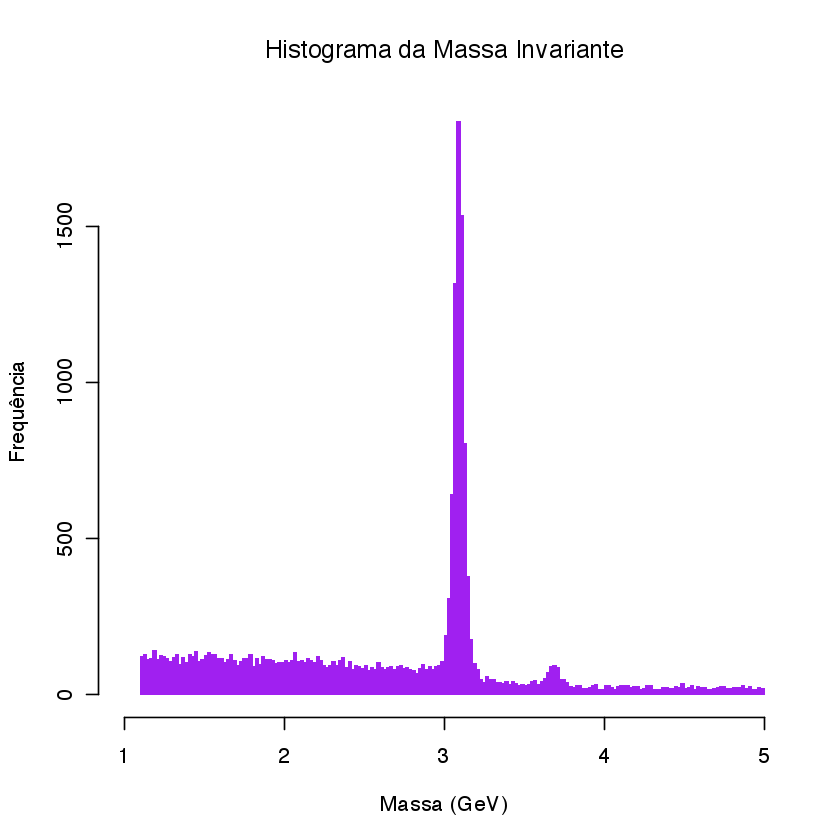

In [35]:
hist(tbsel$mass, breaks = 200, xlim=c(1,5),
     main="Histograma da Massa Invariante",
     xlab = "Massa (GeV)",ylab="Frequência ", 
     lty="blank", 
     col="purple")

Observamos um pico maior perto do valor de $3.1$ GeV  e outro pequeno perto de $3.7$ GeV.
Esses valores correspondem às massas de duas partículas que decaem em dois múons ou mais específicamente, um múon e um anti-múon (múon carregado positivamente). 

Olhando na base de dados do  [Particle Data Group](http://pdg.lbl.gov/), podemos ver que essas partículas são os **mésons** (partículas **hadrônicas** compostas de um quark e um anti-quark)  ***J/ψ(1S)*** e ***ψ(2S)***, respectivamente. 


### Graficando com o tidyverse

Podemos condensar o processo de importar, manipular as variáveis e graficar o histograma com um código muito enxuto:



Warning message in sqrt(E^2 - ptotal^2):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 3 rows containing missing values (geom_bar).”

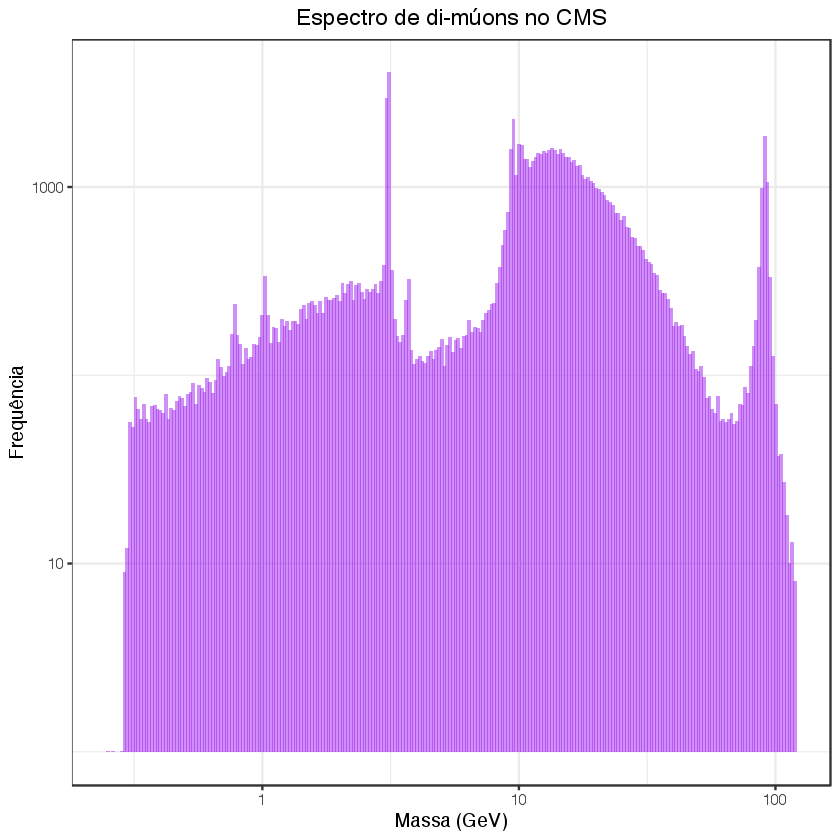

In [37]:
read_csv("http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv", 
         col_types = cols()) %>% 
  mutate(ptotal = sqrt((px1+px2)^2 + (py1+py2)^2 + (pz1+pz2)^2), 
         E = E1+E2, 
         mass = sqrt(E^2 - ptotal^2)) %>% 
  filter(mass >0.1 & mass<120) %>% 
  ggplot(aes(mass)) + 
     geom_histogram(bins = 250, fill = "purple", alpha = 0.5) + 
     xlab("Massa (GeV)") + 
     ylab("Frequência") + 
     scale_x_continuous(trans = 'log10') +
     scale_y_continuous(trans = 'log10') +
     ggtitle("Espectro de di-múons no CMS") + 
     theme_bw() + 
     theme(plot.title = element_text(hjust = 0.5))

Agora está ficando bom!

A cadeia de comandos pode ser lida como uma frase, com uma sucessão de **ações** sobre os dados:

"**Leia** o arquivo, 
  logo **mude** o conteúdo criando as novas variáveis `ptotal`,`E` e `mass`, 
  logo **filtre** para ver só as observações no intervalo desejado, 
  logo **grafique** com os parâmetros apropriados"

O pacote de gráficos do tidyverse é ``ggplot2``, onde as diferentes opções do gráfico estão sequenciadas com símbolo `+`. Neste caso eu escolhi usar uma escala `log-log` que permite ter uma visualização abrangente de várias ordens de grandeza, e assim observar vários picos de ressonância.

As opções do gráfico são:

- `ggplot()` a função central do pacote `ggplot2`, que trabalha com o princípio de *camadas*:
    1. `aes(mass)` quer dizer que vamos usar a variável `mass` 
    1. `geom_histogram()` tomar a variável e fazer o histograma
    1. `xlab()` e `ylab()` os nomes dos eixos
    1. `ggtitle()` título do gráfico
    1. `theme_bw()` tema preto-e-branco, 
    1. `theme()` permite manipular alguns elementos específicos do gráfico

## Ajustando uma função ao pico do $J/\psi$

Voltando ao *tibble* onde já habiamos selecionado o intervalo que apresenta o pico do méson $J/\psi$, podemos chamar a função hist sem graficar para ter só os resultados das frequências nos intervalos.

In [38]:
a<-hist(tbsel$mass,breaks=200,plot=FALSE)

In [39]:
mydf<- data.frame(x=a$mids, nobs=a$counts) 
print(head(mydf))

     x nobs
1 1.11  123
2 1.13  128
3 1.15  112
4 1.17  116
5 1.19  142
6 1.21  113


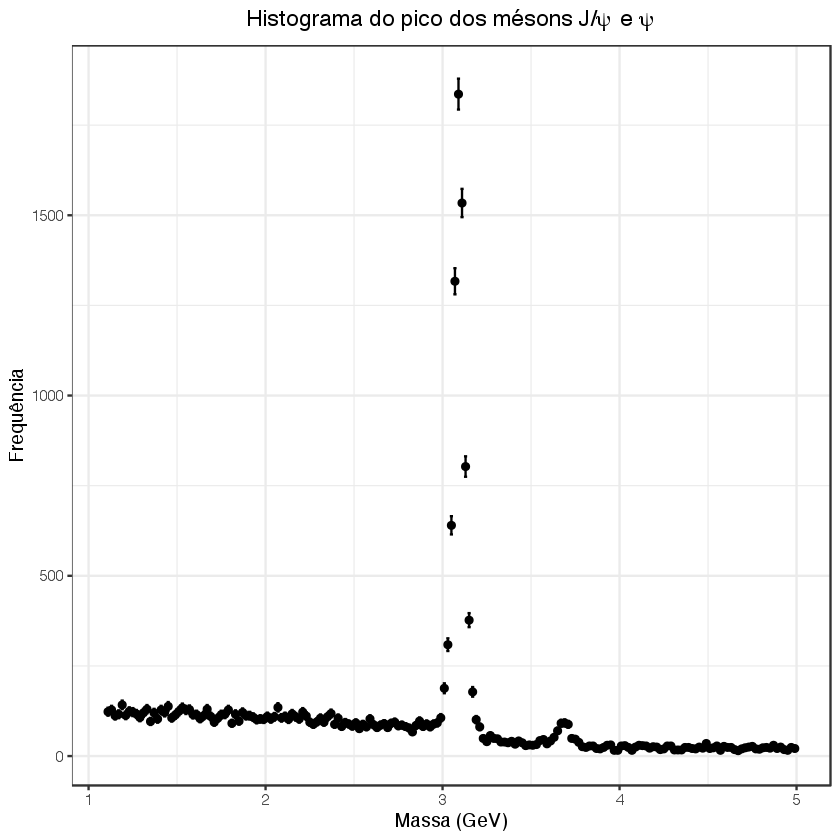

In [40]:
library(latex2exp)
mydf %>%
   ggplot(aes(x,nobs, ymin=nobs-sqrt(nobs),ymax=nobs+sqrt(nobs))) + 
   geom_point() + 
   geom_errorbar() + 
   xlab("Massa (GeV)")+
   ylab("Frequência")+
   ggtitle(TeX("Histograma do pico dos mésons J/$\\psi$ e $\\psi$"))+
   theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### A função que descreve os dados

Uma possível função para descrever esses dois picos seria a soma de uma gaussiana com média perto de $3.1$, outra com média perto de $3.7$ e uma reta decrescente como "base" (nosso *background*).

In [41]:
my2gausspluslin <- function(x, mean1, sigma1, norm1,mean2,sigma2,norm2,a,b) {
    
    f <- norm1 * exp(-1*((x-mean1)/sigma1)^2)+ norm2 * exp(-1*((x-mean2)/sigma2)^2) + a*x +b
    return(f)
}


Vou chamar a função `nls` que faz a optimização dos parámetros da função com mínimos quadrados não lineares [documentação](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/nls.html).

In [42]:
res <- nls( nobs ~ my2gausspluslin(x,mean1,sigma1,norm1,mean2,sigma2,norm2,a,b), 
           data = mydf, 
           start=list(mean1=3.1, sigma1=0.1, norm1=3000,mean2=3.7,sigma2=0.05,norm2=30,a=-10,b=100))
summary(res)


Formula: nobs ~ my2gausspluslin(x, mean1, sigma1, norm1, mean2, sigma2, 
    norm2, a, b)

Parameters:
         Estimate Std. Error   t value Pr(>|t|)    
mean1   3.093e+00  2.501e-04 12368.436  < 2e-16 ***
sigma1  4.189e-02  3.562e-04   117.597  < 2e-16 ***
norm1   1.731e+03  1.269e+01   136.445  < 2e-16 ***
mean2   3.686e+00  7.868e-03   468.453  < 2e-16 ***
sigma2  3.522e-02  1.122e-02     3.140 0.001963 ** 
norm2   5.044e+01  1.384e+01     3.645 0.000346 ***
a      -3.294e+01  1.071e+00   -30.758  < 2e-16 ***
b       1.695e+02  3.471e+00    48.844  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.74 on 187 degrees of freedom

Number of iterations to convergence: 16 
Achieved convergence tolerance: 5.399e-06


Aqui o resultado foi salvo na variável `res`, e posso aplicar esse resultado com a função `predict`. Vamos adicionar uma coluna do número calculado a partir da função ao data frame e salvar com um novo nome de `nexp` por *expected*, número esperado segundo um modelo de 2 gaussianas mais um fundo linear.

In [43]:
newdf<- mydf%>% mutate(nexp = predict(res,mydf))
print(head(newdf))

     x nobs     nexp
1 1.11  123 132.9737
2 1.13  128 132.3149
3 1.15  112 131.6560
4 1.17  116 130.9972
5 1.19  142 130.3383
6 1.21  113 129.6794


Graficamos a predição

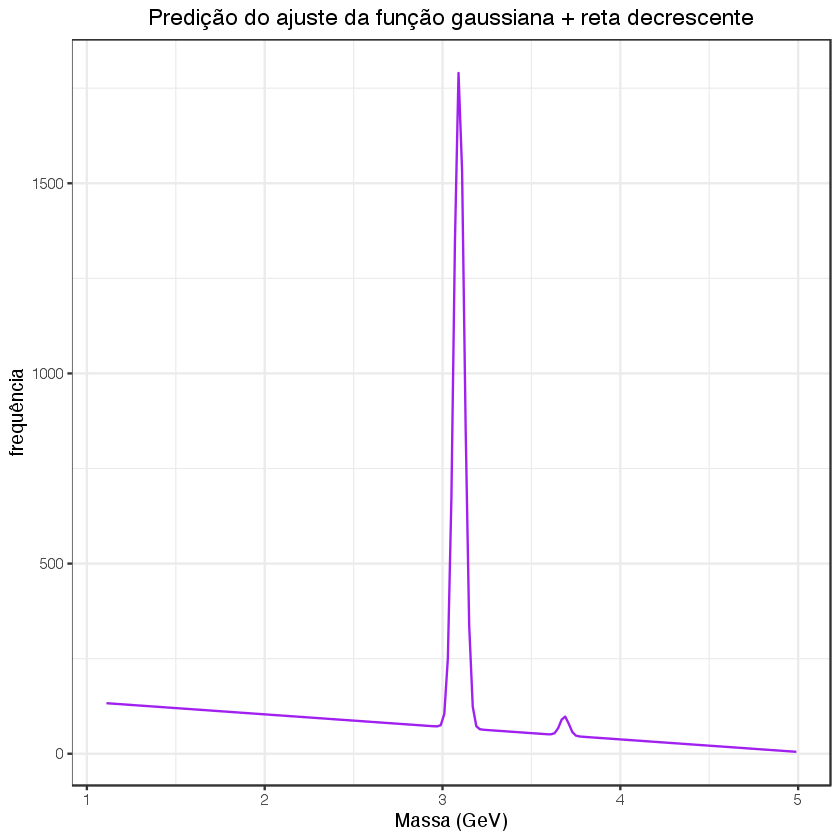

In [44]:
newdf%>%
ggplot(aes(x,nexp))+
 geom_path(color="purple")+
 xlab("Massa (GeV)")+
 ylab("frequência")+ 
 ggtitle("Predição do ajuste da função gaussiana + reta decrescente")+
 theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Resultado 

Finalmente graficamos os pontos das frequências observadas (com erros de distribuição de *Poisson*, $\sigma_n =\sqrt{n}$ )   junto com a linha da predição.

Warning message:
“Ignoring unknown aesthetics: y”

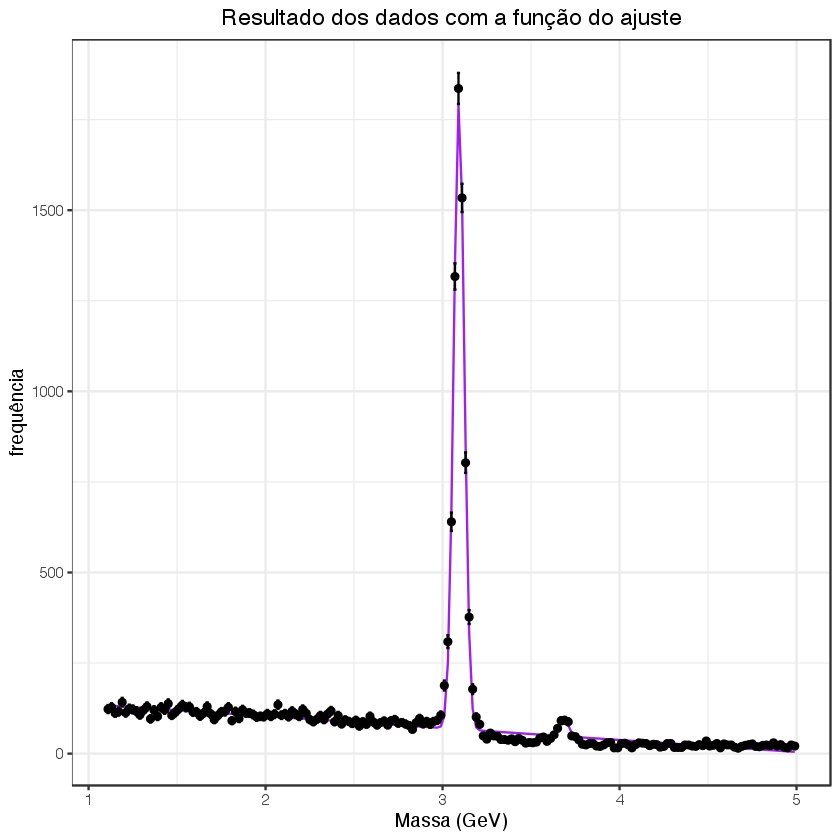

In [45]:
ggplot(newdf) +
 geom_path(aes(x,nexp),color="purple")+
 geom_point(aes(x,nobs))+
 geom_errorbar(aes(x,nobs, ymin=nobs-sqrt(nobs),ymax=nobs+sqrt(nobs)))+
 xlab("Massa (GeV)")+
 ylab("frequência")+ 
 ggtitle("Resultado dos dados com a função do ajuste")+
 theme_bw() +theme(plot.title = element_text(hjust = 0.5))

## Motivação!

Agora estou entusiasmada, vamos dar uma olhada no pico de maior massa nesse espectro?
É o pico do bóson Z, que é análogo a um fóton, só que com massa alta (para uma partícula subatómica).

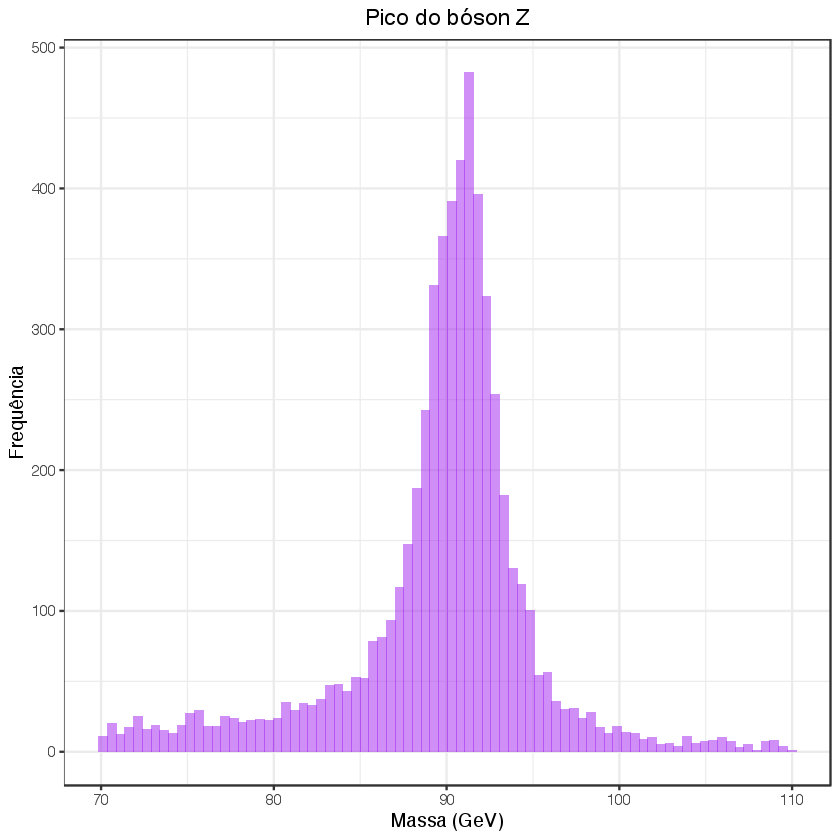

In [46]:
tbZboson<-tbmumu %>% filter(mass>70 & mass <110)


tbZboson %>% 
ggplot(aes(mass)) + 
     geom_histogram(bins = 80, fill = "purple", alpha = 0.5) + 
     xlab("Massa (GeV)") + 
     ylab("Frequência") + 
     ggtitle("Pico do bóson Z") + 
     theme_bw() + 
     theme(plot.title = element_text(hjust = 0.5))

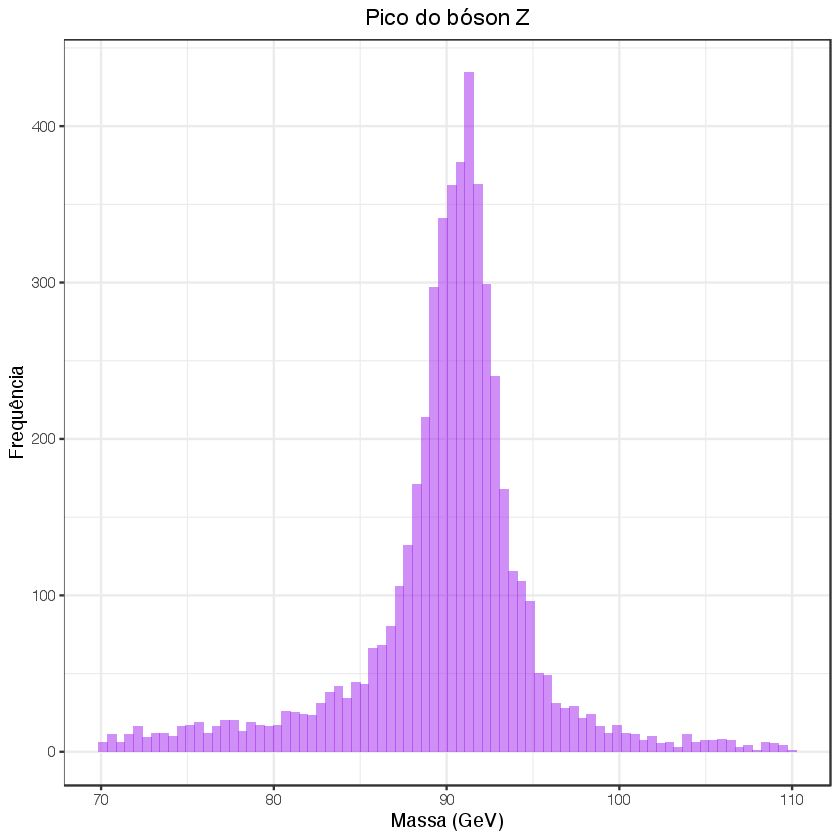

In [47]:
tbZboson %>% filter(abs(eta1)<2.4 & abs(eta2)<2.4, pt1>20 & pt2>20, type1=="G" & type2=="G") %>%
ggplot(aes(mass)) + 
     geom_histogram(bins = 80, fill = "purple", alpha = 0.5) + 
     xlab("Massa (GeV)") + 
     ylab("Frequência") + 
     ggtitle("Pico do bóson Z") + 
     theme_bw() + 
     theme(plot.title = element_text(hjust = 0.5))

In [48]:
zfilt<- tbZboson %>% filter(abs(eta1)<2.4 & abs(eta2)<2.4, pt1>20 & pt2>20, type1=="G" & type2=="G")  

zh<- hist(zfilt$mass,breaks=80,plot=FALSE)

zdf<-data.frame(x=zh$mids,n=zh$counts)
print(head(zdf))

      x  n
1 70.25 10
2 70.75  8
3 71.25  8
4 71.75 10
5 72.25 19
6 72.75  9


In [49]:
breitwpluslin  <- function(x,M,gamma,N,a,b){
    
    b<- a*x +b 
    s<- N*( (2*sqrt(2)*M*gamma*sqrt(M**2*(M**2+gamma**2)))/(pi*sqrt(M**2+sqrt(M**2*(M**2+gamma**2)))) )/((x**2-M**2)**2+M**2*gamma**2)
    return(b+s)
}

In [50]:
library(minpack.lm)
resz <-nlsLM( n~ breitwpluslin(x,m,g,norm,a,b),
           data = zdf, 
           start=list(m=90, g=3, norm =100,a=-10,b=100))
summary(resz)


Formula: n ~ breitwpluslin(x, m, g, norm, a, b)

Parameters:
       Estimate Std. Error  t value Pr(>|t|)    
m      90.90515    0.02804 3242.298  < 2e-16 ***
g       4.23815    0.09440   44.895  < 2e-16 ***
norm 2757.98245   51.43696   53.619  < 2e-16 ***
a      -0.28158    0.09698   -2.903  0.00485 ** 
b      24.11621    8.83846    2.729  0.00792 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.925 on 75 degrees of freedom

Number of iterations to convergence: 12 
Achieved convergence tolerance: 1.49e-08


In [51]:
newz<- zdf %>% mutate(nexp=predict(resz,zdf))
print(as_tibble(newz))

# A tibble: 80 x 3
       x     n  nexp
   <dbl> <int> <dbl>
 1  70.2    10  9.82
 2  70.8     8  9.91
 3  71.2     8 10.0 
 4  71.8    10 10.2 
 5  72.2    19 10.3 
 6  72.8     9 10.5 
 7  73.2    10 10.7 
 8  73.8    10 10.9 
 9  74.2    13 11.2 
10  74.8    14 11.5 
# … with 70 more rows


Warning message:
“Ignoring unknown aesthetics: y”

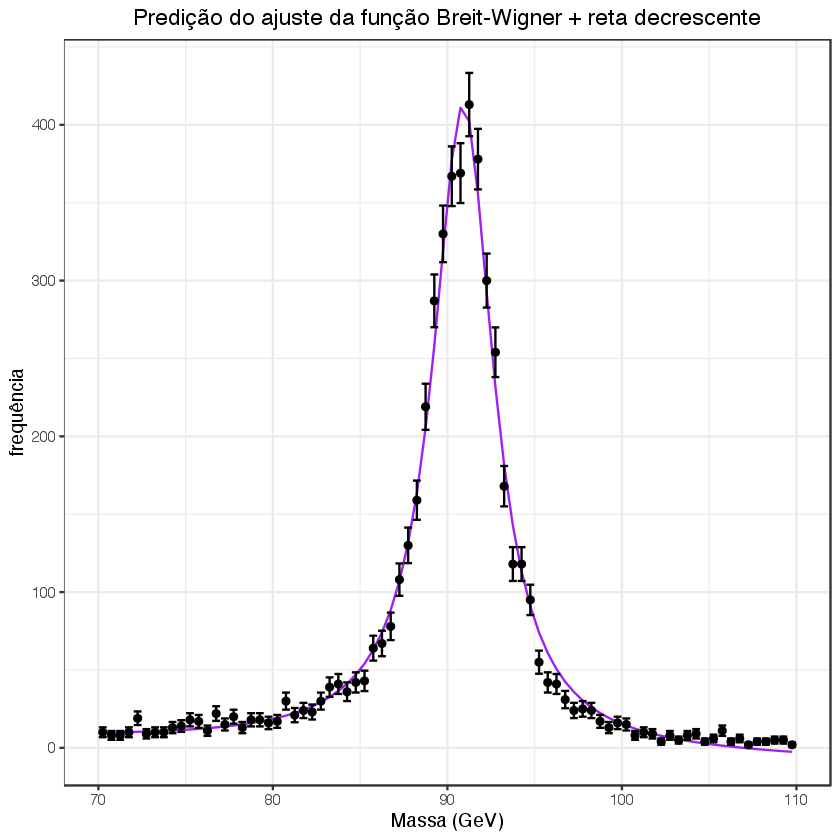

In [52]:
newz%>%
ggplot(aes(x,nexp))+
 geom_path(color="purple")+
geom_point(aes(x,n))+
 geom_errorbar(aes(x,n, ymin=n-sqrt(n),ymax=n+sqrt(n)))+
 xlab("Massa (GeV)")+
 ylab("frequência")+ 
 ggtitle("Predição do ajuste da função Breit-Wigner + reta decrescente")+
 theme_bw() + theme(plot.title = element_text(hjust = 0.5))

Ahhh amei! 
Corações roxinhos 4 ever 💜💜💜